# 2.1 Carregamento dos Dados Limpos

In [1]:
import pandas as pd

df_limpo = pd.read_csv('../data/processed/imoveis_bh_cleaned.csv')

df_limpo.head()

,id,area_m2,quartos,banheiros,vagas_garagem,bairro,andar,preco,tipo_imovel,ano_construcao
0,1,85,3,2,1,Savassi,5,750000,Apartamento,1995
1,2,120,4,3,2,Lourdes,10,1200000,Apartamento,2010
2,3,250,5,4,3,Pampulha,0,2500000,Casa,2005
3,4,60,1,1,1,Centro,2,400000,Apartamento,2018
4,5,180,4,3,2,Anchieta,3,1500000,Apartamento,2008


# 2.2 Engenharia de features

In [2]:
from datetime import datetime

ano_atual = datetime.now().year

df_limpo['idade_imovel'] = ano_atual - df_limpo['ano_construcao']

df_limpo.head()

,id,area_m2,quartos,banheiros,vagas_garagem,bairro,andar,preco,tipo_imovel,ano_construcao,idade_imovel
0,1,85,3,2,1,Savassi,5,750000,Apartamento,1995,30
1,2,120,4,3,2,Lourdes,10,1200000,Apartamento,2010,15
2,3,250,5,4,3,Pampulha,0,2500000,Casa,2005,20
3,4,60,1,1,1,Centro,2,400000,Apartamento,2018,7
4,5,180,4,3,2,Anchieta,3,1500000,Apartamento,2008,17


# 2.3 Criando váriaveis dummies

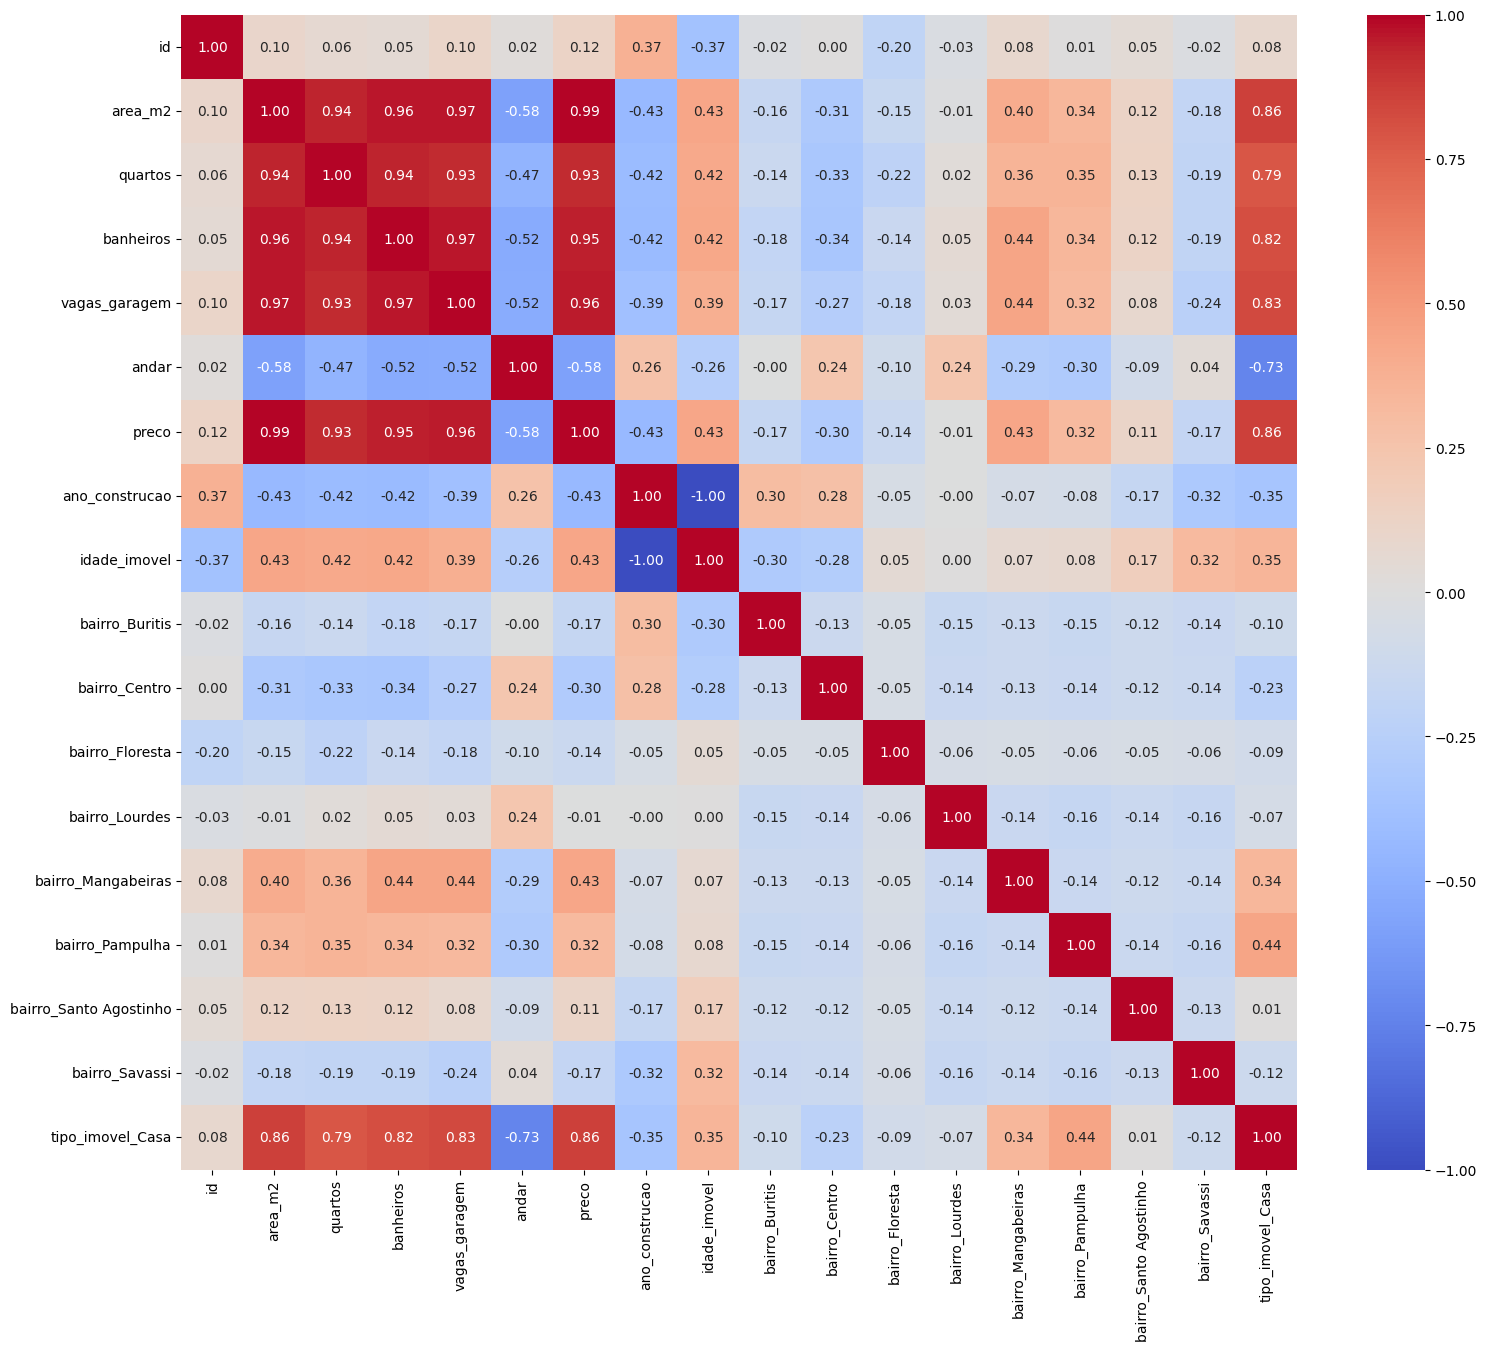

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

colunas_categoricas = df_limpo.select_dtypes(include=['object']).columns
df_dummies = pd.get_dummies(df_limpo, columns=colunas_categoricas, drop_first=True)

corr = df_dummies.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

# 2.4 Construção e análise do modelo

In [4]:
import statsmodels.formula.api as sm
import numpy as np

modelo = sm.ols(formula='np.log(preco) ~ area_m2 + bairro_Buritis + bairro_Centro + bairro_Floresta + bairro_Lourdes + bairro_Mangabeiras + bairro_Savassi + bairro_Pampulha', data=df_dummies)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(preco)   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     265.1
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           4.16e-59
Time:                        08:05:16   Log-Likelihood:                 57.733
No. Observations:                  99   AIC:                            -97.47
Df Residuals:                      90   BIC:                            -74.11
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     13.2522      0.043    304.962      0.000      13.166      13.339
bairro_Buritis[T.True]        -0.1360      0.051     -2.647      0.010      -0.238      -0.034
bairro_Centro[T.True]         -0.2472      0.055     -4.532      0.000      -0.356      -0.139
bairro_Floresta[T.True]       -0.3527      0.106     -3.319      0.001      -0.564      -0.142
bairro_Lourdes[T.True]         0.0408      0.048      0.843      0.402      -0.055       0.137
bairro_Mangabeiras[T.True]     0.0317      0.057      0.560      0.577      -0.081       0.144
bairro_Savassi[T.True]        -0.0926      0.050     -1.846      0.068      -0.192       0.007
bairro_Pampulha[T.True]        0.0960      0.051      1.885      0.063      -0.005       0.197
area_m2                        0.0056      0.000     32.015      0.000       0.005       0.006
==============================================================================
Omnibus:                        2.679   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                2.204
Skew:                          -0.358   Prob(JB):                        0.332
Kurtosis:                       3.149   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 2.5 Avaliação dos pressupostos do modelo

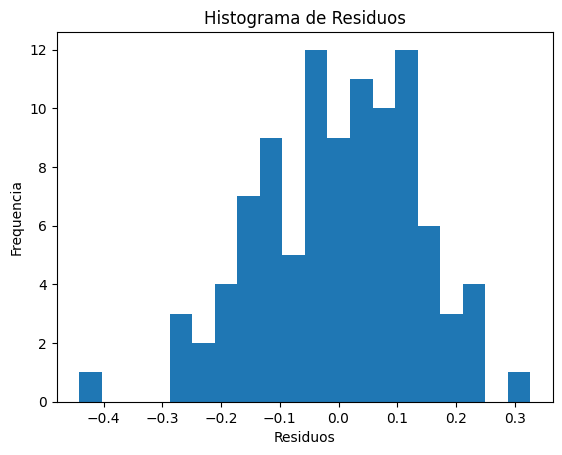

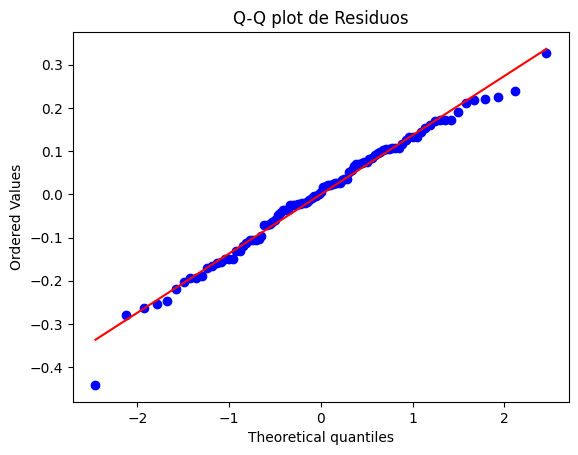

Shapiro-Wilk estatistica: 0.989 , p-value: 0.553


In [5]:
import scipy.stats as stats

residuos = modelo.resid

plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frequencia")
plt.title("Histograma de Residuos")
plt.show()

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q plot de Residuos")
plt.show()

stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk estatistica: {stat:.3f} , p-value: {pval:.3f}')